In [350]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score 

In [306]:
Datos = pd.read_csv(r'D:\UNAD\Ultimo semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\Car details v3.csv')

In [307]:
Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [308]:
Datos.isnull().sum()*100/Datos.shape[0]

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [309]:
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


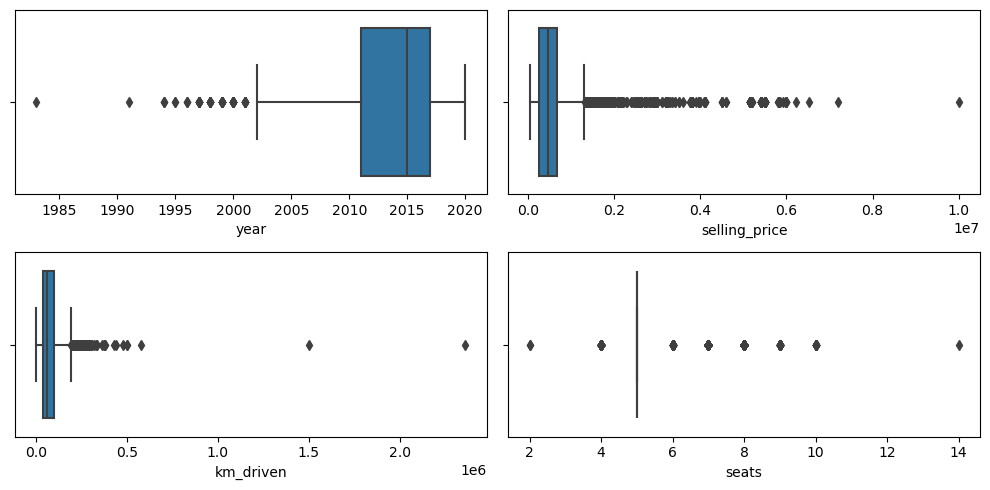

In [310]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(x=Datos['year'], ax = axs[0,0])
plt2 = sns.boxplot(x=Datos['selling_price'], ax = axs[0,1])
plt3 = sns.boxplot(x=Datos['km_driven'], ax = axs[1,0])
plt4 = sns.boxplot(x=Datos['seats'], ax = axs[1,1])
plt.tight_layout()

In [311]:
print("Cantidad de Registros con cero años: ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en Pecio de venta: ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en kilometros conducidos: ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en asientos: ",Datos['seats'].isin([0]).sum())

Cantidad de Registros con cero años:  0
Cantidad de Registros con cero en Pecio de venta:  0
Cantidad de Registros con cero en kilometros conducidos:  0
Cantidad de Registros con cero en asientos:  0


In [312]:
# datos Atipicos

nivel_minimo=1960
nivel_maximo=2024
Total_Atipicos=((Datos['year']<nivel_minimo)|(Datos['year']>nivel_maximo)).sum()
print("El total de datos atípicos en year es {}".format(Total_Atipicos))

El total de datos atípicos en year es 0


In [313]:
nivel_minimo=1000
nivel_maximo=10000000
Total_Atipicos=((Datos['selling_price']<nivel_minimo)|(Datos['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos en selling_price es {}".format(Total_Atipicos))

El total de datos atípicos en selling_price es 0


In [314]:
nivel_minimo= 0
nivel_maximo=1000000
Total_Atipicos=((Datos['km_driven']<nivel_minimo)|(Datos['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos en km_driven es {}".format(Total_Atipicos))

El total de datos atípicos en km_driven es 2


In [315]:
Datos=Datos[(Datos['km_driven']<nivel_maximo)&(Datos['km_driven']>nivel_minimo)]

In [316]:
nivel_minimo= 0
nivel_maximo=1000000
Total_Atipicos=((Datos['km_driven']<nivel_minimo)|(Datos['km_driven']>nivel_maximo)).sum()
print("El total de datos atípicos en km_driven es {}".format(Total_Atipicos))

El total de datos atípicos en km_driven es 0


In [317]:
nivel_minimo= 0
nivel_maximo= 30
Total_Atipicos=((Datos['seats']<nivel_minimo)|(Datos['seats']>nivel_maximo)).sum()
print("El total de datos atípicos en seats es {}".format(Total_Atipicos))

El total de datos atípicos en seats es 0


In [318]:
Datos['selling_price'].value_counts()

selling_price
300000     227
600000     213
350000     209
550000     203
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: count, Length: 677, dtype: int64

In [319]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8126 non-null   object 
 1   year           8126 non-null   int64  
 2   selling_price  8126 non-null   int64  
 3   km_driven      8126 non-null   int64  
 4   fuel           8126 non-null   object 
 5   seller_type    8126 non-null   object 
 6   transmission   8126 non-null   object 
 7   owner          8126 non-null   object 
 8   mileage        7905 non-null   object 
 9   engine         7905 non-null   object 
 10  max_power      7911 non-null   object 
 11  torque         7904 non-null   object 
 12  seats          7905 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.8+ KB


In [320]:
Datos['mileage'].fillna(Datos['mileage'].mode()[0], inplace=True)
Datos['engine'].fillna(Datos['engine'].mode()[0], inplace=True)
Datos['max_power'].fillna(Datos['max_power'].mode()[0], inplace=True)
Datos['torque'].fillna(Datos['torque'].mode()[0], inplace=True)
Datos['seats'].fillna(Datos['seats'].mode()[0], inplace=True)

In [321]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8126 non-null   object 
 1   year           8126 non-null   int64  
 2   selling_price  8126 non-null   int64  
 3   km_driven      8126 non-null   int64  
 4   fuel           8126 non-null   object 
 5   seller_type    8126 non-null   object 
 6   transmission   8126 non-null   object 
 7   owner          8126 non-null   object 
 8   mileage        8126 non-null   object 
 9   engine         8126 non-null   object 
 10  max_power      8126 non-null   object 
 11  torque         8126 non-null   object 
 12  seats          8126 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.8+ KB


In [322]:
Datos.drop(columns=['name'], inplace=True)

In [323]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8126 non-null   int64  
 1   selling_price  8126 non-null   int64  
 2   km_driven      8126 non-null   int64  
 3   fuel           8126 non-null   object 
 4   seller_type    8126 non-null   object 
 5   transmission   8126 non-null   object 
 6   owner          8126 non-null   object 
 7   mileage        8126 non-null   object 
 8   engine         8126 non-null   object 
 9   max_power      8126 non-null   object 
 10  torque         8126 non-null   object 
 11  seats          8126 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 825.3+ KB


In [324]:
# Crear columnas one-hot para la columna "transmission"
one_hot_encoded = pd.get_dummies(Datos['fuel'], prefix='fuel')

# Concatenar las columnas one-hot al DataFrame original
Datos = pd.concat([Datos, one_hot_encoded], axis=1)


In [325]:
# Crear columnas one-hot para la columna "transmission"
one_hot_encoded = pd.get_dummies(Datos['transmission'], prefix='transmission')

# Concatenar las columnas one-hot al DataFrame original
Datos = pd.concat([Datos, one_hot_encoded], axis=1)

In [326]:
# Crear columnas one-hot para la columna "transmission"
one_hot_encoded = pd.get_dummies(Datos['owner'], prefix='owner')

# Concatenar las columnas one-hot al DataFrame original
Datos = pd.concat([Datos, one_hot_encoded], axis=1)

In [327]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 8127
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        8126 non-null   int64  
 1   selling_price               8126 non-null   int64  
 2   km_driven                   8126 non-null   int64  
 3   fuel                        8126 non-null   object 
 4   seller_type                 8126 non-null   object 
 5   transmission                8126 non-null   object 
 6   owner                       8126 non-null   object 
 7   mileage                     8126 non-null   object 
 8   engine                      8126 non-null   object 
 9   max_power                   8126 non-null   object 
 10  torque                      8126 non-null   object 
 11  seats                       8126 non-null   float64
 12  fuel_CNG                    8126 non-null   bool   
 13  fuel_Diesel                 8126 non-n

In [328]:
Datos.drop(columns=['seller_type'], inplace=True)
Datos.drop(columns=['fuel'], inplace=True)
Datos.drop(columns=['transmission'], inplace=True)
Datos.drop(columns=['owner'], inplace=True)
Datos.drop(columns=['mileage'], inplace=True)
Datos.drop(columns=['engine'], inplace=True)
Datos.drop(columns=['max_power'], inplace=True)
Datos.drop(columns=['torque'], inplace=True)

In [329]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8126 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        8126 non-null   int64  
 1   selling_price               8126 non-null   int64  
 2   km_driven                   8126 non-null   int64  
 3   seats                       8126 non-null   float64
 4   fuel_CNG                    8126 non-null   bool   
 5   fuel_Diesel                 8126 non-null   bool   
 6   fuel_LPG                    8126 non-null   bool   
 7   fuel_Petrol                 8126 non-null   bool   
 8   transmission_Automatic      8126 non-null   bool   
 9   transmission_Manual         8126 non-null   bool   
 10  owner_First Owner           8126 non-null   bool   
 11  owner_Fourth & Above Owner  8126 non-null   bool   
 12  owner_Second Owner          8126 non-null   bool   
 13  owner_Test Drive Car        8126 non-n

In [330]:
X = Datos.drop('selling_price',axis=1) 
Y = Datos['selling_price'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [331]:
X_train.shape

(6094, 14)

In [332]:
X_test.shape

(2032, 14)

In [333]:
model = LinearRegression()

In [334]:
model.fit(X_train, Y_train)

LinearRegression()

In [336]:
Prediccion = model.predict(X_test)

In [337]:
print (Y_test)

3469     229999
6980     459999
2452      65000
3501     150000
2047     127000
         ...   
6962     503000
8024     195000
3217    1150000
4561    1200000
5127     620000
Name: selling_price, Length: 2032, dtype: int64


In [338]:
print (Prediccion)

[  90086.01381668  559559.99260344  185031.89214177 ... 2090908.87532924
  922458.7324225   801313.75948936]


In [341]:
MAE= metrics.mean_absolute_error(Y_test, Prediccion)
MSE=metrics.mean_squared_error(Y_test, Prediccion)
RMSE= np.sqrt(MSE)

In [342]:
MAE

309488.04772577994

In [343]:
MSE

344092313407.5138

In [344]:
RMSE

586593.8231924317

In [351]:
r2_score(Y_test, Prediccion)

0.49303487250987055

Text(0, 0.5, 'Prediccion')

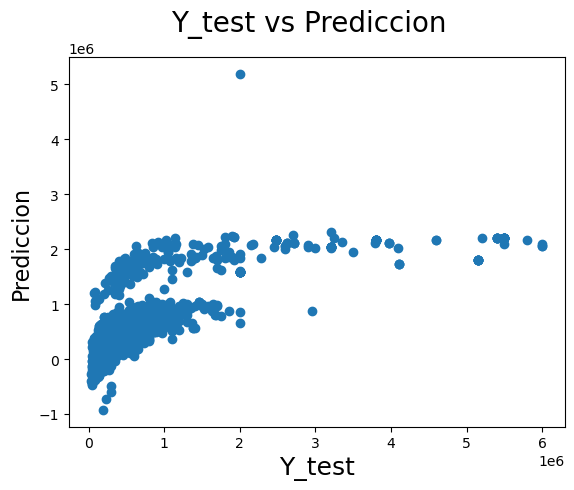

In [345]:
fig = plt.figure()
plt.scatter(Y_test,Prediccion)
fig.suptitle('Y_test vs Prediccion', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('Prediccion', fontsize=16) 